<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/Mod_B_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **17.4 LAGRANGE POLYNOMIAL INTERPOLATION**

Construct a polynomial P(x) of degree n−1 that passes through nn points (x0,y0),(x1,y1),…,(xn,yn).

***LAGRANGE BASIS POLYNOMIALS*** <br>
For each data point xi​, define a basis polynomial Li​(x) with:

- Li(xi)=1

- Li(xj)=0 for all j≠i

**Formula for Li(x)Li​(x):**

  Li(x)= ∏ {n}{j=0}{j≠i} (x−xj) / (xi−xj)


***INTERPOLATING POLYNOMIAL:*** <br>
Combine all basis polynomials scaled by their yi: <br>
P(x)=∑{n}{i=0}(​yi)​⋅[Li​(x)]

**Properties:** <br>
P(x) passes through all input points exactly.

Degree = n−1 (for n points). <br>


WHEN TO USE:

- Small datasets (few points).

- Exact interpolation is critical.

- Avoid for noisy data or large n; prefer splines/regression instead.

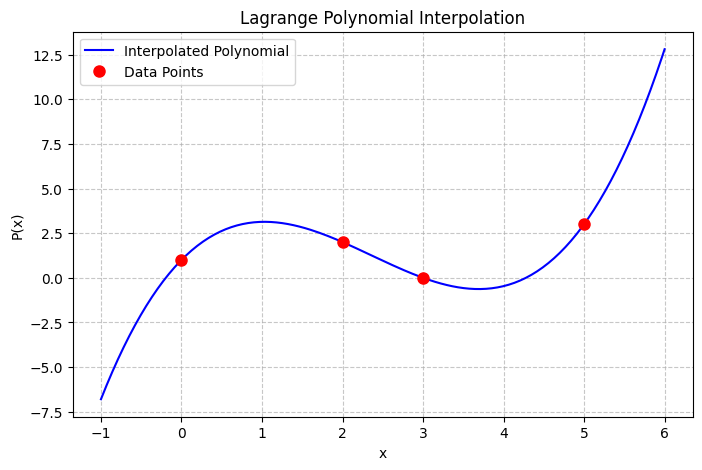

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_polynomial(x_points, y_points, x_eval):

    n = len(x_points)
    P = np.zeros_like(x_eval, dtype=float)

    for i in range(n):
        L = np.ones_like(x_eval, dtype=float)
        for j in range(n):
            if j != i:
                L *= (x_eval - x_points[j]) / (x_points[i] - x_points[j])
        P += y_points[i] * L
    return P


x_data = np.array([0, 2, 3, 5])
y_data = np.array([1, 2, 0, 3])


x_smooth = np.linspace(min(x_data)-1, max(x_data)+1, 200)
y_interp = lagrange_polynomial(x_data, y_data, x_smooth)


plt.figure(figsize=(8, 5))
plt.plot(x_smooth, y_interp, 'b-', label='Interpolated Polynomial')
plt.plot(x_data, y_data, 'ro', markersize=8, label='Data Points')
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# **17.5 Newton’s Polynomial Interpolation**

Construct a polynomial P(x) of degree n-1 that passes through n points (x0,y0), (x1,y1), ..., (xn,yn). Unlike Lagrange interpolation, Newton’s method uses a nested multiplication approach with "divided differences."

<br>

***Divided Differences:***

Coefficients of the polynomial are computed using divided differences.

Notation: f[x0], f[x0,x1], f[x0,x1,x2], etc.

First difference: f[x1,x0] = (y1 - y0)/(x1 - x0)

Second difference: f[x2,x1,x0] = (f[x2,x1] - f[x1,x0])/(x2 - x0)

<br>


***Polynomial Form:***<br>
Newton’s polynomial is built incrementally:
P(x) = a0 + a1*(x - x0) + a2*(x - x0)(x - x1) + ... + an(x - x0)...(x - xn-1)
where:<br>

  a0 = f[x0] = y0

  a1 = f[x1,x0]

  a2 = f[x2,x1,x0]

  ...


- More efficient for adding new data points (no need to recompute entire polynomial).

- Less computationally expensive for large n.

- Order of points matters! Divided differences depend on the sequence of x0, x1, ..., xn.

- Higher-degree polynomials can oscillate wildly between points.

WHEN TO USE:
- Dynamic datasets where points may be added later.

- Exact interpolation is required.

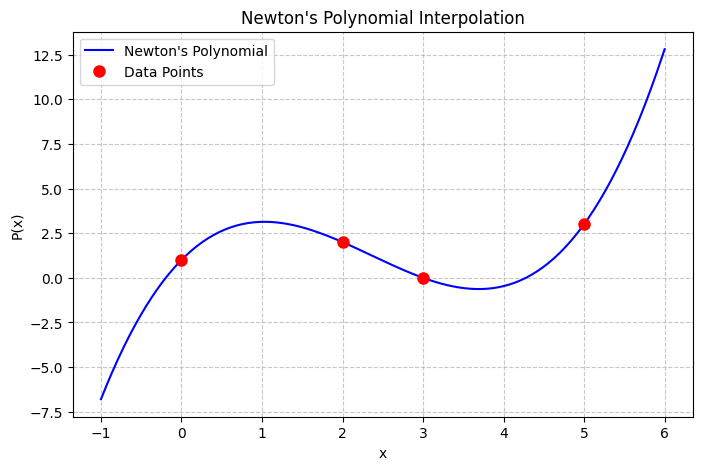

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def divided_differences(x, y):

    n = len(x)
    coef = np.zeros(n)
    for i in range(n):
        coef[i] = y[i]

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x[i] - x[i-j])
    return coef

def newton_polynomial(coef, x_data, x_eval):

    n = len(coef)
    result = coef[-1] * np.ones_like(x_eval)
    for i in range(n-2, -1, -1):
        result = result * (x_eval - x_data[i]) + coef[i]
    return result


x_data = np.array([0, 2, 3, 5])
y_data = np.array([1, 2, 0, 3])


coef = divided_differences(x_data, y_data)


x_smooth = np.linspace(min(x_data)-1, max(x_data)+1, 200)
y_interp = newton_polynomial(coef, x_data, x_smooth)


plt.figure(figsize=(8, 5))
plt.plot(x_smooth, y_interp, 'b-', label="Newton's Polynomial")
plt.plot(x_data, y_data, 'ro', markersize=8, label='Data Points')
plt.title("Newton's Polynomial Interpolation")
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()